### BEstimate Analysis

##### *MYC* CBE and ABE Analysis
##### Used Parameters
- Editing window: 3-9
- sgRNA length: 20 nucleotides

In [1]:
import pandas, numpy, scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation
warnings.filterwarnings("ignore")
data_path = "/lustre/scratch125/casm/team215mg/cd7/BEstimate/BEstimate/paper/data/"
guide_path = "/lustre/scratch125/casm/team215mg/cd7/BEstimate/BEstimate/paper/output/examples/"

**Read *MYC* data**

In [2]:
myc = pandas.read_csv(data_path + "Cansu_H23_MYC_Jan_23.csv", index_col=0)

In [3]:
myc[:4]

,Gene,sgRNA_ID,sgRNA_type,chr,start,end,seq,guide,off_target_summary_NG,Amino_Acid_Change,Consequence,Amino_Acid_Position,PHENOTYPES,Amino_Acid_Position_simple,editor,L2FC_H23_Control_plasmid_1,L2FC_H23_Control_plasmid_2,L2FC_H23_Control_plasmid_average
1,MYC,873fffe694701212fbb96d4768b08adc6c4bfa03,exonic,8,127742951,127742973,ACTCTGACTCCTAGAATAATCTA,TAGATTATTCTAGGAGTCAG,"{0: 1, 1: 0, 2: 0, 3: 55, 4: 631}",NaN,NaN,NaN,NaN,NaN,CBE,0.144407,-0.102576,0.026195
2,MYC,26de2371e1f6c019043356312b11c50e76ad95e2,exonic,8,127742945,127742967,TCTTTGACTCTGACTCCTAGAAT,ATTCTAGGAGTCAGAGTCAA,"{0: 1, 1: 0, 2: 5, 3: 56, 4: 781}",NaN,UTR,NaN,-,NaN,CBE,-0.640435,-0.084883,-0.336081
3,MYC,e4ff2e6c73de6c965b4d8955e070720e3076e92d,exonic,8,127742941,127742963,ACTTTCTTTGACTCTGACTCCTA,TAGGAGTCAGAGTCAAAGAA,"{0: 1, 1: 0, 2: 5, 3: 123, 4: 1317}",NaN,UTR,NaN,-,NaN,CBE,0.471092,-0.003722,0.253131
4,MYC,0a43dabb2cc0510049a3d7a6c4fdb41afcb2a7fe,exonic,8,127742928,127742950,TCAATAAATAATTACTTTCTTTG,CAAAGAAAGTAATTATTTAT,"{0: 1, 1: 1, 2: 25, 3: 453, 4: 4291}",NaN,NaN,NaN,NaN,NaN,CBE,0.175627,-0.007045,0.087180


**Read *MYC* gRNA predictions from BEstimate**

**Take the gRNAs which are intersected**

In [4]:
abe_pro = pandas.read_csv(guide_path + "ABE_NGN_MYC_protein_df.csv", index_col=0)
cbe_pro = pandas.read_csv(guide_path + "CBE_NGN_MYC_protein_df.csv", index_col=0)

abe_pro["editor"] = "ABE"
cbe_pro["editor"] = "CBE"
p_myc = pandas.concat([abe_pro, cbe_pro])
p_myc = p_myc[(p_myc.Edit_Type == "individual") & (p_myc.gRNA_Target_Sequence.isin(myc.guide.unique()))]
p_myc[:4]

,Edit_Type,CRISPR_PAM_Sequence,CRISPR_PAM_Location,gRNA_Target_Sequence,gRNA_Target_Location,Total_Edit,Edit_Location,Direction,Transcript_ID,Exon_ID,...,is_disruptive_interface_EXP,is_disruptive_interface_MOD,is_disruptive_interface_PRED,disrupted_PDB_int_partners,disrupted_I3D_int_partners,disrupted_Eclair_int_partners,disrupted_PDB_int_genes,disrupted_I3D_int_genes,disrupted_Eclair_int_genes,editor
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
MYC,individual,AAAAAAGGATGGAAGCAAGGAGA,8:127742682-127742704,AAAAAAGGATGGAAGCAAGG,8:127742679-127742704,5,127742696,left,ENST00000621592,ENSE00003847400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABE
MYC,individual,AAAAAAGGATGGAAGCAAGGAGA,8:127742682-127742704,AAAAAAGGATGGAAGCAAGG,8:127742679-127742704,5,127742699,left,ENST00000621592,ENSE00003847400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABE
MYC,individual,AAAAAAGGATGGAAGCAAGGAGA,8:127742682-127742704,AAAAAAGGATGGAAGCAAGG,8:127742679-127742704,5,127742700,left,ENST00000621592,ENSE00003847400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABE
MYC,individual,AAAAAAGGATGGAAGCAAGGAGA,8:127742682-127742704,AAAAAAGGATGGAAGCAAGG,8:127742679-127742704,5,127742701,left,ENST00000621592,ENSE00003847400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABE


In [5]:
protein = p_myc[~pandas.isna(p_myc.Protein_Position)]

In [6]:
def rename_mutational_consequences(consq):
    if consq == "missense_variant":
        return "missense"
    elif consq == "missense_mutation":
        return "missense"
    elif consq == "missense_variant_splice_region_variant":
        return "splice variant"
    elif consq == "splice_region_variant":
        return "splice variant"
    elif consq == "stop_retained_variant":
        return "synonymous"
    elif consq == "synonymous_variant":
        return "synonymous"
    elif consq == "splice_region_variant_synonymous_variant":
        return "splice variant"
    elif consq == "splice_acceptor_variant":
        return "splice variant"
    elif consq == "splice_donor_variant":
        return "splice variant"
    elif consq == "splice_region_variant_intron_variant":
        return "splice variant"
    elif consq == "splice_region_variant,intron_variant":
        return "splice variant"
    elif consq == "splice_donor_region_variant_intron_variant":
        return "splice variant"
    elif consq == "splice_polypyrimidine_tract_variant_intron_variant":
        return "splice variant"
    elif consq == "splice_polypyrimidine_tract_variant_splice_region_variant_intron_variant":
        return "splice variant"
    elif consq == "splice_donor_5th_base_variant_intron_variant":
        return "splice variant"
    elif consq == "downstream_gene_variant":
        return "UTR"
    elif consq == "stop_gained_splice_region_variant":
        return "stop codon"
    elif consq == "stop_gained,splice_region_variant":
        return "stop codon"
    elif consq == "start_lost":
        return "start lost"
    elif consq == "stop_gained_start_lost":
        return "stop codon"
    elif consq == "upstream_gene_variant":
        return "promoter"
    elif consq == "intron_variant":
        return "intron"
    elif consq == "5_prime_UTR_variant":
        return "5'UTR"
    elif consq == "stop_gained":
        return "stop codon"

    
def deconv_cons(consq):
    if consq == "stop codon":
        return ["stop_gained", "stop_gained_start_lost", "stop_gained,splice_region_variant", "stop_gained_splice_region_variant"]
    elif consq == "5'UTR":
        return ["5_prime_UTR_variant"]
    elif consq == "intron":
        return ["intron_variant"]
    elif consq == "promoter":
        return ["upstream_gene_variant"]
    elif consq == "start lost":
        return ["start_lost"]
    elif consq == "UTR":
        return ["downstream_gene_variant"]
    elif consq == "splice variant":
        return ["splice_donor_5th_base_variant_intron_variant", "splice_polypyrimidine_tract_variant_splice_region_variant_intron_variant", 
                "splice_polypyrimidine_tract_variant_intron_variant", "splice_donor_region_variant_intron_variant", "splice_region_variant,intron_variant",
                "splice_region_variant_intron_variant", "splice_donor_variant", "splice_acceptor_variant", "splice_region_variant_synonymous_variant", 
                "splice_region_variant", "missense_variant_splice_region_variant"]
    elif consq == "synonymous":
        return ["synonymous_variant", "stop_retained_variant"]
    elif consq == "missense":
        return ["missense_variant", "missense_mutation"]
    
    
def select_most_severe(list_of_muts):
    if "stop codon" in list_of_muts:
        return "stop codon"
    elif "start lost" in list_of_muts:
        return "start lost"
    elif "splice variant" in list_of_muts:
        return "splice variant"
    elif "missense" in list_of_muts:
        return "missense"
    elif "UTR" in list_of_muts:
        return "UTR"
    elif "intron" in list_of_muts:
        return "intron"
    elif "synonymous" in list_of_muts:
        return "synonymous"

In [7]:
severe_dfs = list()
for pos, pos_df in protein.groupby(["Protein_Position"]):
    pos_consq = select_most_severe([rename_mutational_consequences(mut) for mut in list(pos_df["most_severe_consequence"].unique())])
    df = pos_df[pos_df.most_severe_consequence.isin(deconv_cons(pos_consq))][[
        "CRISPR_PAM_Sequence", "gRNA_Target_Sequence", "editor", "Protein_Position", "most_severe_consequence", 
        "curated_Domain", "PTM", "disrupted_PDB_int_genes", "cosmic_id", "ancestral_populations", "sift_prediction"]]
    severe_dfs.append(df)

In [8]:
severe_df = pandas.concat(severe_dfs)

In [9]:
severe_df = severe_df.drop_duplicates()
severe_df

,CRISPR_PAM_Sequence,gRNA_Target_Sequence,editor,Protein_Position,most_severe_consequence,curated_Domain,PTM,disrupted_PDB_int_genes,cosmic_id,ancestral_populations,sift_prediction
Hugo_Symbol,,,,,,,,,,,
MYC,GCATCGTCGCGGGAGGCTGCTGG,GCATCGTCGCGGGAGGCTGC,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious
MYC,GGGGCATCGTCGCGGGAGGCTGC,GGGGCATCGTCGCGGGAGGC,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious
MYC,TGAGGGGCATCGTCGCGGGAGGC,TGAGGGGCATCGTCGCGGGA,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious
MYC,CGACGATGCCCCTCAACGTTAGC,CGACGATGCCCCTCAACGTT,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious
MYC,GGGGCATCGTCGCGGGAGGCTGC,GGGGCATCGTCGCGGGAGGC,CBE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious
...,...,...,...,...,...,...,...,...,...,...,...
MYC,TCTCCCCGAAGGGAGAAGGGTGT,TCTCCCCGAAGGGAGAAGGG,CBE,99,missense_variant,NaN,NaN,MYC,COSV105010201,NaN,tolerated
MYC,TGTCTCCCCGAAGGGAGAAGGGT,TGTCTCCCCGAAGGGAGAAG,CBE,99,missense_variant,NaN,NaN,MYC,COSV52379809,NaN,tolerated
MYC,TGTCTCCCCGAAGGGAGAAGGGT,TGTCTCCCCGAAGGGAGAAG,CBE,99,missense_variant,NaN,NaN,MYC,COSV105010201,NaN,tolerated


In [10]:
severe_df['Protein_Position'] = pandas.to_numeric(severe_df['Protein_Position'], downcast='integer')

In [12]:
severe_df= pandas.read_csv(data_path + "annotated_MYC.csv", index_col=0)

In [13]:
severe_df["position"] = severe_df.apply(lambda x: int(x.Protein_Position), axis=1)
severe_df[:4]

,Hugo_Symbol,CRISPR_PAM_Sequence,gRNA_Target_Sequence,editor,Protein_Position,most_severe_consequence,curated_Domain,PTM,disrupted_PDB_int_genes,cosmic_id,ancestral_populations,sift_prediction,sgRNA_ID,L2FC_H23_Control_plasmid_average,exact,mm1,mm2,mm3,mm4,position
0,MYC,GCATCGTCGCGGGAGGCTGCTGG,GCATCGTCGCGGGAGGCTGC,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious,bbb51b0545f512a1fd51bb36548c368474317ca9,-0.240246,1,0,1,38,762,1
1,MYC,GGGGCATCGTCGCGGGAGGCTGC,GGGGCATCGTCGCGGGAGGC,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious,115d4ea77c5a9f4710c39134ce2838cf8cb463a6,-0.365128,1,0,0,30,714,1
2,MYC,TGAGGGGCATCGTCGCGGGAGGC,TGAGGGGCATCGTCGCGGGA,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious,99e7135bf084a019d0df6ae8d5123eb677efe669,-1.189890,1,0,1,6,105,1
3,MYC,CGACGATGCCCCTCAACGTTAGC,CGACGATGCCCCTCAACGTT,ABE,1,start_lost,NaN,NaN,NaN,NaN,NaN,deleterious,946df7faecf81dc7ffa4f4ddd589f2f726e0d395,-1.338019,1,0,0,6,44,1


In [19]:
severe_df[(severe_df.sift_prediction=="tolerated") & (severe_df.L2FC_H23_Control_plasmid_average < -2)]

,Hugo_Symbol,CRISPR_PAM_Sequence,gRNA_Target_Sequence,editor,Protein_Position,most_severe_consequence,curated_Domain,PTM,disrupted_PDB_int_genes,cosmic_id,ancestral_populations,sift_prediction,sgRNA_ID,L2FC_H23_Control_plasmid_average,exact,mm1,mm2,mm3,mm4,position
213,MYC,AGCCGCTCCACATACAGTCCTGG,AGCCGCTCCACATACAGTCC,CBE,152,missense_variant,NaN,NaN,NaN,NaN,NaN,tolerated,aefa4fac081ed5037f39d417743346976be2596e,-2.642089,1,1,3,20,248,152
217,MYC,GCCGCTCCACATACAGTCCTGGA,GCCGCTCCACATACAGTCCT,CBE,152,missense_variant,NaN,NaN,NaN,NaN,NaN,tolerated,a3707c8799c048fe2a67bfe5aad848dee00b1800,-2.101820,1,1,1,25,382,152
1022,MYC,GACGGACAGGATGTATGCTGTGG,GACGGACAGGATGTATGCTG,ABE,419,missense_variant,Helix-loop-helix motif,NaN,NaN,NaN,NaN,tolerated,080a53b51cef277326ec9165aee8c6d08b99b8b9,-4.367320,1,0,0,22,328,419


In [14]:
protein[protein.gRNA_Target_Sequence == "GGGGCATCGTCGCGGGAGGC"][["editor","most_severe_consequence", "Protein_Position", "Protein_Position_ensembl", "Protein_Change"]]

,editor,most_severe_consequence,Protein_Position,Protein_Position_ensembl,Protein_Change
Hugo_Symbol,,,,,
MYC,ABE,start_lost,1,1,M/T
MYC,CBE,start_lost,1,1,M/I


In [14]:
myc[myc.guide == "GGGGCATCGTCGCGGGAGGC"]

,Gene,sgRNA_ID,sgRNA_type,chr,start,end,seq,guide,off_target_summary_NG,Amino_Acid_Change,Consequence,Amino_Acid_Position,PHENOTYPES,Amino_Acid_Position_simple,editor,L2FC_H23_Control_plasmid_1,L2FC_H23_Control_plasmid_2,L2FC_H23_Control_plasmid_average
778,MYC,115d4ea77c5a9f4710c39134ce2838cf8cb463a6,exonic,8,127738247,127738269,GCAGCCTCCCGCGACGATGCCCC,GGGGCATCGTCGCGGGAGGC,"{0: 1, 1: 0, 2: 0, 3: 30, 4: 714}","Thr15=, Met16Ile",missense,15 16,-,15.0,CBE,-0.009608,-0.055770,-0.032504
2027,MYC,115d4ea77c5a9f4710c39134ce2838cf8cb463a6,exonic,8,127738247,127738269,GCAGCCTCCCGCGACGATGCCCC,GGGGCATCGTCGCGGGAGGC,"{0: 1, 1: 0, 2: 0, 3: 30, 4: 714}",Met16Thr,missense,16,-,16.0,ABE,-0.792858,-0.035637,-0.365128


In [15]:
severe_df2 = severe_df.copy()
severe_df2["curated_Domain"] = severe_df2.apply(lambda x: "None" if pandas.isna(x.curated_Domain) else x.curated_Domain, axis=1)
severe_df2["cat_curated_Domain"] = None
for ind, row in severe_df2.iterrows():
    if row.curated_Domain == "None":
        severe_df2.loc[ind, "cat_curated_Domain"] = 0
    elif row.curated_Domain == "9aaTAD":
        severe_df2.loc[ind, "cat_curated_Domain"] = 1
    elif row.curated_Domain == "Disordered":
        severe_df2.loc[ind, "cat_curated_Domain"] = 2
    elif row.curated_Domain == "Basic motif":
        severe_df2.loc[ind, "cat_curated_Domain"] = 3
    elif row.curated_Domain == "UBR5-degron":
        severe_df2.loc[ind, "cat_curated_Domain"] = 4
    elif row.curated_Domain == "bHLH":
        severe_df2.loc[ind, "cat_curated_Domain"] = 5
    elif row.curated_Domain == "Helix-loop-helix motif":
        severe_df2.loc[ind, "cat_curated_Domain"] = 6
    elif row.curated_Domain == "Leucine-zipper":
        severe_df2.loc[ind, "cat_curated_Domain"] = 7

In [16]:
severe_df2["curated_cosmic"] = severe_df2.apply(lambda x: 1 if pandas.isna(x.cosmic_id) is False else 0, axis=1)
severe_df2["curated_ancestral_populations"] = severe_df2.apply(lambda x: 1 if pandas.isna(x.ancestral_populations) is False else 0, axis=1)
severe_df2["curated_interface"] = severe_df2.apply(lambda x: 1 if pandas.isna(x.disrupted_PDB_int_genes) is False else 0, axis=1)


deleterious v.s. tolerated: Custom statistical test, P_val:1.961e-10


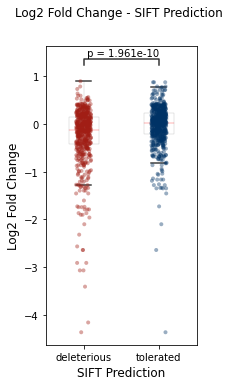

In [149]:
flierprops = dict(marker=".", markerfacecolor="darkgrey", markersize=0, markeredgecolor="none")
medianprops = dict(linestyle="-", linewidth=.3, color="red")
boxprops = dict(facecolor="white", edgecolor="darkgrey", linewidth=.3)
whiskerprops = dict(color="darkgrey", linewidth=.3)

_, mann_pval = mannwhitneyu(list(severe_df2[severe_df2.sift_prediction=="deleterious"]["L2FC_H23_Control_plasmid_average"].dropna().values), 
                            list(severe_df2[severe_df2.sift_prediction=="tolerated"]["L2FC_H23_Control_plasmid_average"].dropna().values))

fig, axis = plt.subplots(1, 1, squeeze=False, figsize=(2.7, 5.5))

plt.suptitle("Log2 Fold Change - SIFT Prediction", fontsize=12)

order = ["deleterious", "tolerated"]

sns.stripplot(x="sift_prediction", y="L2FC_H23_Control_plasmid_average", data=severe_df2,
              palette={"deleterious": "#a11e15", "tolerated": "#003366"},
              ax=axis[0, 0], alpha=0.4, size=4, order=order)

sns.boxplot(x="sift_prediction", y="L2FC_H23_Control_plasmid_average", data=severe_df2, ax=axis[0, 0],
            flierprops=flierprops, medianprops=medianprops, boxprops=boxprops,
            whiskerprops=whiskerprops, order=order, width=0.4)

axis[0, 0].legend([], [], frameon=False)
axis[0, 0].set_xlabel("SIFT Prediction", fontsize=12)
axis[0, 0].tick_params(axis="x", which="major", labelsize=10)
axis[0, 0].set_ylabel("Log2 Fold Change", fontsize=12)

add_stat_annotation(axis[0, 0], data=severe_df2, x="sift_prediction", y="L2FC_H23_Control_plasmid_average", order=order,
                    box_pairs=[("deleterious", "tolerated")],
                    perform_stat_test=False, pvalues=[mann_pval], loc='inside', verbose=2, text_format="full")
#plt.savefig("../output/figures/myc_log2fc_sift.pdf", dpi=300)
plt.show()

In [17]:
def normalisation(val, all):
    n = (val - min(all)) / float((max(all) - min(all)))
    return n


In [18]:
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import scipy

In [19]:
severe_df2["norm_domain"] = severe_df2.apply(
    lambda x: normalisation(x.cat_curated_Domain, list(severe_df2.cat_curated_Domain.values)), axis=1)

severe_df2["norm_cosmic"] = severe_df2.apply(
    lambda x: normalisation(x.curated_cosmic, list(severe_df2.curated_cosmic.values)), axis=1)

severe_df2["norm_ancest"] = severe_df2.apply(
    lambda x: normalisation(x.curated_ancestral_populations, list(severe_df2.curated_ancestral_populations.values)), axis=1)

severe_df2["norm_interface"] = severe_df2.apply(
    lambda x: normalisation(x.curated_interface, list(severe_df2.curated_interface.values)), axis=1)

In [20]:
severe_df2["curated_Phos"] = severe_df2.apply(lambda x: 0 if pandas.isna(x.PTM) else (
    1 if x.PTM.split("-")[0][:7] == "Phospho" else (
    2 if x.PTM.split("-")[0] == "N6" else 0)), axis=1)

severe_df2["norm_ptm"] = severe_df2.apply(
    lambda x: normalisation(x.curated_Phos, list(severe_df2.curated_Phos.values)), axis=1)

In [21]:
severe_df2.PTM.unique()

array([nan, 'N6-acetyllysine-158', 'N6-acetyllysine-163',
       'N6-acetyllysine-172', 'Phosphoserine-176', 'Phosphoserine-21',
       'Phosphothreonine-23', 'Phosphoserine-308', 'N6-acetyllysine-332',
       'N6-acetyllysine-338', 'Phosphothreonine-73', 'Phosphoserine-77',
       'Phosphoserine-86'], dtype=object)

In [22]:
dom_cmap2 = mcolors.ListedColormap(["white", "#f5a37c", "#fdf186","#d59efa", "#9be7f2", "#ff3238", "#89ffc5", "#958ef6"])
ancest_cmap2 = mcolors.ListedColormap(["white", "#330066"])
clinical_cmap2 = mcolors.ListedColormap(["white", "#a73952"])
ptm_cmap2 = mcolors.ListedColormap(["white", "#fcc200", "#c31684"])
int_cmap2 = mcolors.ListedColormap(["white", "#27c8b9"])

In [23]:
severe_df2[["position", "most_severe_consequence", "L2FC_H23_Control_plasmid_average", "norm_domain", "norm_cosmic", "norm_ancest", "norm_interface", "curated_Phos", "norm_ptm"]]

,position,most_severe_consequence,L2FC_H23_Control_plasmid_average,norm_domain,norm_cosmic,norm_ancest,norm_interface,curated_Phos,norm_ptm
0,1,start_lost,-0.240246,0.0,0.0,0.0,0.0,0,0.0
1,1,start_lost,-0.365128,0.0,0.0,0.0,0.0,0,0.0
2,1,start_lost,-1.18989,0.0,0.0,0.0,0.0,0,0.0
3,1,start_lost,-1.338019,0.0,0.0,0.0,0.0,0,0.0
4,1,start_lost,-0.032504,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
1323,99,missense_variant,-1.164712,0.0,1.0,0.0,1.0,0,0.0
1324,99,missense_variant,-0.237441,0.0,1.0,0.0,1.0,0,0.0
1325,99,missense_variant,-0.237441,0.0,1.0,0.0,1.0,0,0.0
1326,99,missense_variant,0.12553,0.0,1.0,0.0,1.0,0,0.0


In [24]:
severe_df2['position'] = pandas.to_numeric(severe_df2['position'], downcast='integer')

In [25]:
scatter_df = severe_df2[["position", "most_severe_consequence", "L2FC_H23_Control_plasmid_average"]].sort_values(by=["position"], ascending=True)
scatter_df

,position,most_severe_consequence,L2FC_H23_Control_plasmid_average
0,1,start_lost,-0.240246
1,1,start_lost,-0.365128
2,1,start_lost,-1.18989
3,1,start_lost,-1.338019
4,1,start_lost,-0.032504
...,...,...,...
1081,453,missense_variant,-0.137705
1080,453,missense_variant,0.060649
1079,453,missense_variant,-0.234839
1083,454,missense_variant,-0.137705


In [26]:
dom_df = severe_df2[["position", "norm_domain"]].drop_duplicates().sort_values(by=["position"], ascending=True)
dom_df2 = pandas.DataFrame(index=list(range(0, 455)), columns = ["position", "norm_domain"])
for ind, row in dom_df2.iterrows():
    dom_df2.loc[ind, "position"] = int(ind)
    if row.position in dom_df.position.unique():
        dom_df2.loc[ind, "norm_domain"] = dom_df[dom_df.position == row.position].norm_domain.values[0]
    else:
        dom_df2.loc[ind, "norm_domain"] = 0.0
dom_df3 = dom_df2.set_index(["position"])
dom_df3['norm_domain'] = pandas.to_numeric(dom_df3['norm_domain'], downcast='float')
dom_df3[:5]

,norm_domain
position,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [27]:
ptm_df = severe_df2[["position", "norm_ptm"]].drop_duplicates().sort_values(by=["position"], ascending=True)
ptm_df2 = pandas.DataFrame(index=list(range(0, 455)), columns = ["position", "norm_ptm"])
for ind, row in ptm_df2.iterrows():
    ptm_df2.loc[ind, "position"] = int(ind)
    if row.position in ptm_df.position.unique():
        ptm_df2.loc[ind, "norm_ptm"] = ptm_df[ptm_df.position == row.position].norm_ptm.values[0]
    else:
        ptm_df2.loc[ind, "norm_ptm"] = 0.0
ptm_df3 = ptm_df2.set_index(["position"])
ptm_df3['norm_ptm'] = pandas.to_numeric(ptm_df3['norm_ptm'], downcast='float')
ptm_df3[:5]

,norm_ptm
position,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [28]:
cosmic_df = severe_df2[["position", "norm_cosmic"]].drop_duplicates().sort_values(by=["position"], ascending=True)
cosmic_df2 = pandas.DataFrame(index=list(range(0, 455)), columns = ["position", "norm_cosmic"])
for ind, row in cosmic_df2.iterrows():
    cosmic_df2.loc[ind, "position"] = int(ind)
    if row.position in cosmic_df.position.unique():
        cosmic_df2.loc[ind, "norm_cosmic"] = 1.0 if 1.0 in cosmic_df[cosmic_df.position == row.position].norm_cosmic.values else 0.0
    else:
        cosmic_df2.loc[ind, "norm_cosmic"] = 0.0
cosmic_df3 = cosmic_df2.set_index(["position"])
cosmic_df3['norm_cosmic'] = pandas.to_numeric(cosmic_df3['norm_cosmic'], downcast='float')
cosmic_df3[:5]

,norm_cosmic
position,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [29]:
interface_df = severe_df2[["position", "norm_interface"]].drop_duplicates().sort_values(by=["position"], ascending=True)
interface_df2 = pandas.DataFrame(index=list(range(0, 455)), columns = ["position", "norm_interface"])
for ind, row in interface_df2.iterrows():
    interface_df2.loc[ind, "position"] = int(ind)
    if row.position in interface_df.position.unique():
        interface_df2.loc[ind, "norm_interface"] = 1.0 if 1.0 in interface_df[interface_df.position == row.position].norm_interface.values else 0.0
    else:
        interface_df2.loc[ind, "norm_interface"] = 0.0
interface_df3 = interface_df2.set_index(["position"])
interface_df3['norm_interface'] = pandas.to_numeric(interface_df3['norm_interface'], downcast='float')
interface_df3[:5]


,norm_interface
position,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [30]:
ancest_df = severe_df2[["position", "norm_ancest"]].drop_duplicates().sort_values(by=["position"], ascending=True)
ancest_df2 = pandas.DataFrame(index=list(range(0, 455)), columns = ["position", "norm_ancest"])
for ind, row in ancest_df2.iterrows():
    ancest_df2.loc[ind, "position"] = int(ind)
    if row.position in ancest_df.position.unique():
        ancest_df2.loc[ind, "norm_ancest"] = 1.0 if 1.0 in ancest_df[ancest_df.position == row.position].norm_ancest.values else 0.0
    else:
        ancest_df2.loc[ind, "norm_ancest"] = 0.0
ancest_df3 = ancest_df2.set_index(["position"])
ancest_df3['norm_ancest'] = pandas.to_numeric(ancest_df3['norm_ancest'], downcast='float')
ancest_df3[:5]

,norm_ancest
position,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


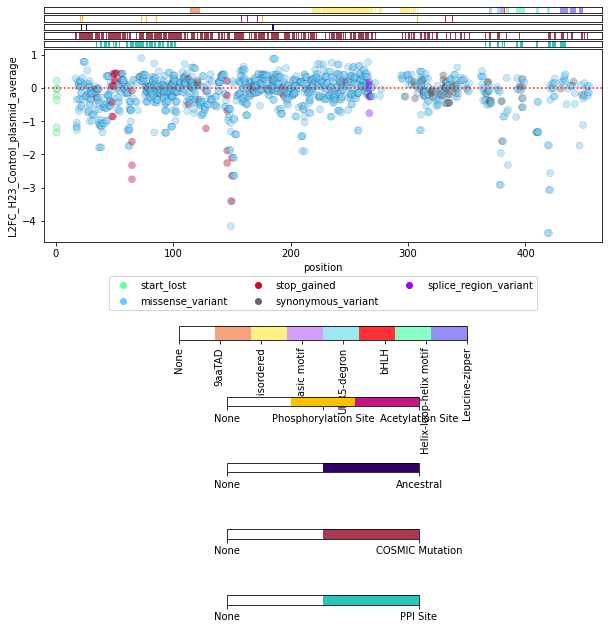

In [118]:
fig, axes = plt.subplots(11, 1, figsize=(10,11), gridspec_kw={'height_ratios': [.2, .2, .2, .2, .2, 6, 3, 2, 2, 2, 2]})
fig.subplots_adjust(hspace=0.04)

axes[0].yaxis.set_ticks_position('none')
#axes[0].xaxis.set_ticks_position('none')
axes[0].axes.get_yaxis().set_visible(False)
axes[0].axes.get_xaxis().set_visible(False)
axes[0].tick_params(labelbottom=False)
axes[0].set_ylabel("Domain")

d = axes[0].pcolor(dom_df3.T, linewidths=0, cmap=dom_cmap2)
fig.delaxes(axes[6])
cbar_d = fig.colorbar(d, ax=axes[6], orientation="horizontal", ticks=dom_df3.norm_domain.unique())
cbar_d.ax.set_xticklabels(['None', '9aaTAD', 'Disordered', 'Basic motif', 'UBR5-degron', 'bHLH', 'Helix-loop-helix motif', 'Leucine-zipper'], rotation=90)

axes[1].yaxis.set_ticks_position('none')
#axes[1].xaxis.set_ticks_position('none')
axes[1].axes.get_yaxis().set_visible(False)
axes[1].axes.get_xaxis().set_visible(False)
axes[1].tick_params(labelbottom=False)
axes[1].set_ylabel("PTM")

p = axes[1].pcolor(ptm_df3.T,  linewidths=0, cmap=ptm_cmap2)
fig.delaxes(axes[7])
cbar_p = fig.colorbar(p, ax=axes[7], orientation="horizontal", ticks=ptm_df3.norm_ptm.unique())
cbar_p.ax.set_xticklabels(['None', 'Phosphorylation Site', 'Acetylation Site'])


axes[2].yaxis.set_ticks_position('none')
#axes[2].xaxis.set_ticks_position('none')
axes[2].axes.get_yaxis().set_visible(False)
axes[2].axes.get_xaxis().set_visible(False)
axes[2].tick_params(labelbottom=False)
axes[2].set_ylabel("Ancestral Alteration")

ans = axes[2].pcolor(ancest_df3.T,  linewidths=0, cmap=ancest_cmap2)
fig.delaxes(axes[8])
cbar_ans = fig.colorbar(ans, ax=axes[8], orientation="horizontal", ticks=[0,1])
cbar_ans.ax.set_xticklabels(['None', 'Ancestral'])


axes[3].yaxis.set_ticks_position('none')
#axes[3].xaxis.set_ticks_position('none')
axes[3].axes.get_yaxis().set_visible(False)
axes[3].axes.get_xaxis().set_visible(False)
axes[3].tick_params(labelbottom=False)
axes[3].set_ylabel("COSMIC")

cos = axes[3].pcolor(cosmic_df3.T,  linewidths=0, cmap=clinical_cmap2)
fig.delaxes(axes[9])
cbar_cos = fig.colorbar(cos, ax=axes[9], orientation="horizontal", ticks=[0,1])
cbar_cos.ax.set_xticklabels(['None', 'COSMIC Mutation'])

axes[4].yaxis.set_ticks_position('none')
#axes[4].xaxis.set_ticks_position('none')
axes[4].axes.get_yaxis().set_visible(False)
axes[4].axes.get_xaxis().set_visible(False)
axes[4].tick_params(labelbottom=False)
axes[4].set_ylabel("PPI")

ppi = axes[4].pcolor(interface_df3.T,  linewidths=0, cmap=int_cmap2)
fig.delaxes(axes[10])
cbar_ppi = fig.colorbar(ppi, ax=axes[10], orientation="horizontal", ticks=[0,1])
cbar_ppi.ax.set_xticklabels(['None', 'PPI Site'])

sns.scatterplot(data = scatter_df, x="position", y="L2FC_H23_Control_plasmid_average", 
                hue="most_severe_consequence", alpha=.40, s=50, edgecolor="black", linewidth=0.25,ax=axes[5],
                palette = {"start_lost": "#66ff99", "stop_gained": "#cc0033", "synonymous_variant": "#666666", 
                           "splice_region_variant": "#9900ff", "missense_variant": "#66ccff"})

axes[5].set_xlim(-10, 465)
axes[0].sharex(axes[5])
axes[1].sharex(axes[5])
axes[2].sharex(axes[5])
axes[3].sharex(axes[5])
axes[4].sharex(axes[5])
axes[5].axhline(y=0, color='red', linestyle=':')

axes[5].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
               fancybox=True, shadow=False, ncol=3)


#fig.savefig('../output/figures/myc_insilico_annotation.pdf', dpi=300)
plt.show()


In [31]:
severe_df2[severe_df2.L2FC_H23_Control_plasmid_average < -4]

,Hugo_Symbol,CRISPR_PAM_Sequence,gRNA_Target_Sequence,editor,Protein_Position,most_severe_consequence,curated_Domain,PTM,disrupted_PDB_int_genes,cosmic_id,...,cat_curated_Domain,curated_cosmic,curated_ancestral_populations,curated_interface,norm_domain,norm_cosmic,norm_ancest,norm_interface,curated_Phos,norm_ptm
201,MYC,GCTCCACATACAGTCCTGGATGA,GCTCCACATACAGTCCTGGA,ABE,149,missense_variant,None,NaN,NaN,NaN,...,0,0,0,0,0.000000,0.0,0.0,0.0,0,0.0
1022,MYC,GACGGACAGGATGTATGCTGTGG,GACGGACAGGATGTATGCTG,ABE,419,missense_variant,Helix-loop-helix motif,NaN,NaN,NaN,...,6,0,0,0,0.857143,0.0,0.0,0.0,0,0.0
1027,MYC,GACGGACAGGATGTATGCTGTGG,GACGGACAGGATGTATGCTG,ABE,420,missense_variant,Helix-loop-helix motif,NaN,MAX,COSV52370317,...,6,1,0,1,0.857143,1.0,0.0,1.0,0,0.0


In [32]:
p_myc[p_myc.gRNA_Target_Sequence =="GACGGACAGGATGTATGCTG"]

,Edit_Type,CRISPR_PAM_Sequence,CRISPR_PAM_Location,gRNA_Target_Sequence,gRNA_Target_Location,Total_Edit,Edit_Location,Direction,Transcript_ID,Exon_ID,...,is_disruptive_interface_EXP,is_disruptive_interface_MOD,is_disruptive_interface_PRED,disrupted_PDB_int_partners,disrupted_I3D_int_partners,disrupted_Eclair_int_partners,disrupted_PDB_int_genes,disrupted_I3D_int_genes,disrupted_Eclair_int_genes,editor
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
MYC,individual,GACGGACAGGATGTATGCTGTGG,8:127740834-127740856,GACGGACAGGATGTATGCTG,8:127740831-127740856,2,127740849,left,ENST00000621592,ENSE00003847400,...,False,False,True,NaN,NaN,"P06400,P08621,P11387,P11802,P17480,P25490,P273...",NaN,NaN,RUVBL1;TRIM6;KAT2A;FBXW8;PAK2;TAF10;TP53BP1;SA...,ABE
MYC,individual,GACGGACAGGATGTATGCTGTGG,8:127740834-127740856,GACGGACAGGATGTATGCTG,8:127740831-127740856,2,127740851,left,ENST00000621592,ENSE00003847400,...,True,False,True,P61244,NaN,"P06400,P08621,P25490,P27361,P33993,P38398,P494...",MAX,NaN,RUVBL1;TRIM6;KAT2A;PAK2;TP53BP1;SAP130;SNRNP70...,ABE
MYC,individual,GACGGACAGGATGTATGCTGTGG,8:127740834-127740856,GACGGACAGGATGTATGCTG,8:127740831-127740856,2,127740850,left,ENST00000621592,ENSE00003847400,...,False,False,True,NaN,NaN,"P06400,P08621,P11387,P11802,P17480,P25490,P273...",NaN,NaN,RUVBL1;TRIM6;KAT2A;FBXW8;PAK2;TAF10;TP53BP1;SA...,CBE
MYC,individual,GACGGACAGGATGTATGCTGTGG,8:127740834-127740856,GACGGACAGGATGTATGCTG,8:127740831-127740856,2,127740854,left,ENST00000621592,ENSE00003847400,...,True,False,True,"P01106,P61244",NaN,"P06400,P08621,P25490,P27361,P33993,P38398,P494...",MAX;MYC,NaN,RUVBL1;TRIM6;KAT2A;PAK2;TP53BP1;SAP130;SNRNP70...,CBE


In [33]:
severe_df[(severe_df.gRNA_Target_Sequence =="GACGGACAGGATGTATGCTG") & (severe_df.editor == "ABE") & (severe_df.disrupted_PDB_int_genes == "MAX")].loc[1027]

Hugo_Symbol                                                              MYC
CRISPR_PAM_Sequence                                  GACGGACAGGATGTATGCTGTGG
gRNA_Target_Sequence                                    GACGGACAGGATGTATGCTG
editor                                                                   ABE
Protein_Position                                                         420
most_severe_consequence                                     missense_variant
curated_Domain                                        Helix-loop-helix motif
PTM                                                                      NaN
disrupted_PDB_int_genes                                                  MAX
cosmic_id                                                       COSV52370317
ancestral_populations                                                    NaN
sift_prediction                                                  deleterious
sgRNA_ID                            080a53b51cef277326ec9165aee8c6d08b99b8b9

In [34]:
abe_pro[(abe_pro.gRNA_Target_Sequence =="GACGGACAGGATGTATGCTG") & (abe_pro.Edit_Location == "127740851")][[
    "CRISPR_PAM_Sequence", "Protein_Position_ensembl", "Protein_Change", "Protein_Position", "curated_Domain", "swissprot_vep"]]
                                                                                                           

,CRISPR_PAM_Sequence,Protein_Position_ensembl,Protein_Change,Protein_Position,curated_Domain,swissprot_vep
Hugo_Symbol,,,,,,
MYC,GACGGACAGGATGTATGCTGTGG,405,S/P,420,Helix-loop-helix motif,P01106


In [123]:
import requests

uniprot_server = "https://www.ebi.ac.uk/proteins/api/"
uniprot_api = "proteins?offset=0&size=-1&accession=P01106"
api_request = requests.get(uniprot_server + uniprot_api, headers={"Accept": "application/json"})


In [124]:
for i in api_request.json():
    uni_seq = i["sequence"]["sequence"]
uni_seq

'MDFFRVVENQQPPATMPLNVSFTNRNYDLDYDSVQPYFYCDEEENFYQQQQQSELQPPAPSEDIWKKFELLPTPPLSPSRRSGLCSPSYVAVTPFSLRGDNDGGGGSFSTADQLEMVTELLGGDMVNQSFICDPDDETFIKNIIIQDCMWSGFSAAAKLVSEKLASYQAARKDSGSPNPARGHSVCSTSSLYLQDLSAAASECIDPSVVFPYPLNDSSSPKSCASQDSSAFSPSSDSLLSSTESSPQGSPEPLVLHEETPPTTSSDSEEEQEDEEEIDVVSVEKRQAPGKRSESGSPSAGGHSKPPHSPLVLKRCHVSTHQHNYAAPPSTRKDYPAAKRVKLDSVRVLRQISNNRKCTSPRSSDTEENVKRRTHNVLERQRRNELKRSFFALRDQIPELENNEKAPKVVILKKATAYILSVQAEEQKLISEEDLLRKRREQLKHKLEQLRNSCA'

In [125]:
uni_seq[419]

'S'

In [126]:
severe_df2.loc[178]

Hugo_Symbol                                                              MYC
CRISPR_PAM_Sequence                                  CATCAAAAACATCATCATCCAGG
gRNA_Target_Sequence                                    CATCAAAAACATCATCATCC
editor                                                                   ABE
Protein_Position                                                         142
most_severe_consequence                                     missense_variant
curated_Domain                                                          None
PTM                                                                      NaN
disrupted_PDB_int_genes                                                  NaN
cosmic_id                                                       COSV99420113
ancestral_populations                                                    NaN
sift_prediction                                                  deleterious
sgRNA_ID                            7a8a96d2be809d76e6a47463f708bb95d354ec64

In [127]:
severe_df2.disrupted_PDB_int_genes.unique()
                           

array([nan, 'MYC', 'MAX', 'MAX;MYC'], dtype=object)

In [51]:
severe_df2[~pandas.isna(severe_df2.PTM)].PTM.unique()

array(['N6-acetyllysine-158', 'N6-acetyllysine-163',
       'N6-acetyllysine-172', 'Phosphoserine-176', 'Phosphoserine-21',
       'Phosphothreonine-23', 'Phosphoserine-308', 'N6-acetyllysine-332',
       'N6-acetyllysine-338', 'Phosphothreonine-73', 'Phosphoserine-77',
       'Phosphoserine-86'], dtype=object)

In [52]:
len(severe_df2[~pandas.isna(severe_df2.PTM)].CRISPR_PAM_Sequence.unique())

43

In [41]:
severe_df2[~pandas.isna(severe_df2.cosmic_id)]

,Hugo_Symbol,CRISPR_PAM_Sequence,gRNA_Target_Sequence,editor,Protein_Position,most_severe_consequence,curated_Domain,PTM,disrupted_PDB_int_genes,cosmic_id,...,cat_curated_Domain,curated_cosmic,curated_ancestral_populations,curated_interface,norm_domain,norm_cosmic,norm_ancest,norm_interface,curated_Phos,norm_ptm
12,MYC,GTCGTTGTCTCCCCGAAGGGAGA,GTCGTTGTCTCCCCGAAGGG,CBE,100,missense_variant,None,NaN,NaN,COSV52379826,...,0,1,0,0,0.0,1.0,0.0,0.0,0,0.0
13,MYC,GTTGTCTCCCCGAAGGGAGAAGG,GTTGTCTCCCCGAAGGGAGA,CBE,100,missense_variant,None,NaN,NaN,COSV52379826,...,0,1,0,0,0.0,1.0,0.0,0.0,0,0.0
14,MYC,TGTCTCCCCGAAGGGAGAAGGGT,TGTCTCCCCGAAGGGAGAAG,CBE,100,missense_variant,None,NaN,NaN,COSV52379826,...,0,1,0,0,0.0,1.0,0.0,0.0,0,0.0
15,MYC,TTGTCTCCCCGAAGGGAGAAGGG,TTGTCTCCCCGAAGGGAGAA,CBE,100,missense_variant,None,NaN,NaN,COSV52379826,...,0,1,0,0,0.0,1.0,0.0,0.0,0,0.0
16,MYC,ACAACGACGGCGGTGGCGGGAGC,ACAACGACGGCGGTGGCGGG,ABE,101,missense_variant,None,NaN,MYC,COSV105010202,...,0,1,0,1,0.0,1.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,MYC,TCTCCCCGAAGGGAGAAGGGTGT,TCTCCCCGAAGGGAGAAGGG,CBE,99,missense_variant,None,NaN,MYC,COSV105010201,...,0,1,0,1,0.0,1.0,0.0,1.0,0,0.0
1324,MYC,TGTCTCCCCGAAGGGAGAAGGGT,TGTCTCCCCGAAGGGAGAAG,CBE,99,missense_variant,None,NaN,MYC,COSV52379809,...,0,1,0,1,0.0,1.0,0.0,1.0,0,0.0
1325,MYC,TGTCTCCCCGAAGGGAGAAGGGT,TGTCTCCCCGAAGGGAGAAG,CBE,99,missense_variant,None,NaN,MYC,COSV105010201,...,0,1,0,1,0.0,1.0,0.0,1.0,0,0.0
1326,MYC,TTGTCTCCCCGAAGGGAGAAGGG,TTGTCTCCCCGAAGGGAGAA,CBE,99,missense_variant,None,NaN,MYC,COSV52379809,...,0,1,0,1,0.0,1.0,0.0,1.0,0,0.0


In [42]:
severe_df2[pandas.isna(severe_df2.cosmic_id)]

,Hugo_Symbol,CRISPR_PAM_Sequence,gRNA_Target_Sequence,editor,Protein_Position,most_severe_consequence,curated_Domain,PTM,disrupted_PDB_int_genes,cosmic_id,...,cat_curated_Domain,curated_cosmic,curated_ancestral_populations,curated_interface,norm_domain,norm_cosmic,norm_ancest,norm_interface,curated_Phos,norm_ptm
0,MYC,GCATCGTCGCGGGAGGCTGCTGG,GCATCGTCGCGGGAGGCTGC,ABE,1,start_lost,None,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0
1,MYC,GGGGCATCGTCGCGGGAGGCTGC,GGGGCATCGTCGCGGGAGGC,ABE,1,start_lost,None,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0
2,MYC,TGAGGGGCATCGTCGCGGGAGGC,TGAGGGGCATCGTCGCGGGA,ABE,1,start_lost,None,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0
3,MYC,CGACGATGCCCCTCAACGTTAGC,CGACGATGCCCCTCAACGTT,ABE,1,start_lost,None,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0
4,MYC,GGGGCATCGTCGCGGGAGGCTGC,GGGGCATCGTCGCGGGAGGC,CBE,1,start_lost,None,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,MYC,GGAGAAGGGTGTGACCGCAACGT,GGAGAAGGGTGTGACCGCAA,ABE,96,missense_variant,None,NaN,MYC,NaN,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0.0
1315,MYC,CCCTTCGGGGAGACAACGACGGC,CCCTTCGGGGAGACAACGAC,CBE,98,missense_variant,None,NaN,MYC,NaN,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0.0
1316,MYC,CTTCGGGGAGACAACGACGGCGG,CTTCGGGGAGACAACGACGG,CBE,98,missense_variant,None,NaN,MYC,NaN,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0.0
1317,MYC,TCCCTTCGGGGAGACAACGACGG,TCCCTTCGGGGAGACAACGA,CBE,98,missense_variant,None,NaN,MYC,NaN,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0.0


<AxesSubplot:xlabel='L2FC_H23_Control_plasmid_average', ylabel='Density'>

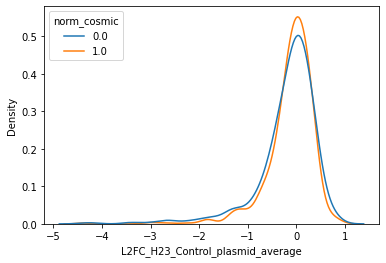

In [45]:
sns.kdeplot(data=severe_df2, x="L2FC_H23_Control_plasmid_average", hue="norm_cosmic")

In [47]:
severe_df2[severe_df2.norm_ancest == 1.0][["ancestral_populations", "L2FC_H23_Control_plasmid_average"]]

,ancestral_populations,L2FC_H23_Control_plasmid_average
357,"gnomadg_remaining, af, gnomadg_afr, gnomade_af...",0.078124
358,"gnomadg_remaining, af, gnomadg_afr, gnomade_af...",0.247797
359,"gnomadg_remaining, af, gnomadg_afr, gnomade_af...",0.028416
360,"gnomadg_remaining, af, gnomadg_afr, gnomade_af...",0.221255
361,"gnomadg_remaining, af, gnomadg_afr, gnomade_af...",-0.032359
362,"gnomadg_remaining, af, gnomadg_afr, gnomade_af...",0.003856
524,"gnomadg_asj, gnomadg_mid, gnomade_asj",-0.546867
526,"gnomadg_asj, gnomadg_mid, gnomade_asj",0.04043
529,"gnomadg_asj, gnomadg_mid, gnomade_asj",-0.151795
702,"gnomade_mid, gnomade_amr, gnomade_nfe, gnomadg...",-0.24311


In [49]:
len(severe_df2[severe_df2.norm_cosmic == 1].CRISPR_PAM_Sequence.unique()) * 100.0 / len(severe_df2.CRISPR_PAM_Sequence.unique())

72.20338983050847